# Task 1

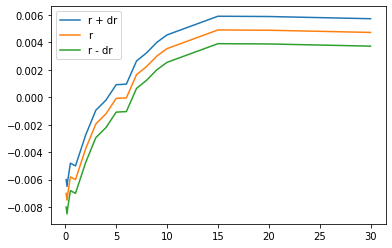

In [ ]:
from matplotlib.pyplot import plot, legend
import numpy as np

curve_tenors = np.array([1/12, 1/6, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 30.0])
curve_rates = np.array([-0.700, -0.750, -0.700, -0.580, -0.600, -0.375, -0.194, -0.120, -0.008, -0.004, 0.165, 0.225, 0.301, 0.355, 0.491, 0.489, 0.473])*1e-2

plot(curve_tenors, curve_rates + 1e-3, label = 'r + dr')
plot(curve_tenors, curve_rates, label = 'r')
plot(curve_tenors, curve_rates - 1e-3, label = 'r - dr')
legend()

In [ ]:
def getBond(email):
    import hashlib
    h = int(hashlib.sha1(email.encode('utf-8')).hexdigest(), 16)
    bonds = ['CH0184249990', 'CH0344958688', 'CH0344958498']
    return bonds[h % len(bonds)]
getBond('omyglob@gmail.com')

'CH0344958688'

Interest rate: 0.50% \\
Maturity: 28.06.2045 \\
Amount: CHF 222.550 million (0 million own tranche) \\
Issue price: 111.90% \\
Yield p.a.: -0.001% \\
Total bids: CHF 258.550 million \\
Allotment in last price category: 100% \\
Offers without price details: CHF 106.850 million \\
Settlement: 22.09.2021 \\
ISIN no. (until settlement): CH0557778385 \\
Fungible with ISIN no.: CH0344958498 \\



In [ ]:
import numpy as np
import scipy.interpolate

f = scipy.interpolate.interp1d(curve_tenors, curve_rates, kind = 'cubic')
f(np.array([9/12, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23]))*1e+2

array([-0.57302573,  0.39426036,  0.42761533,  0.45494013,  0.47610995,
        0.49966239,  0.50285691,  0.50152022,  0.49658902,  0.47968983,
        0.46959521,  0.45965282])

In [ ]:
ytm = np.array([-0.573026, -0.600, -0.375, -0.194, -0.120, -0.008, -0.004, 0.165, 0.225, 0.301, 0.355, 0.39426, 0.427615, 0.45494, 0.47611, 0.491,  0.499662,  0.502857,  0.50152 ,  0.496589, 0.489, 0.47969,  0.469595,  0.459653])*1e-2

In [ ]:
days = np.array([276, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360])
payments = np.array([0.5/365*276, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 100.5])

def pv_ytm(days, payments, ytm):
    days = np.cumsum(days) / 360
    df = np.power(1.0 / (ytm + 1.0), days)
    return np.sum(payments*df)

pv_l = pv_ytm(days, payments, ytm-1e-4)
pv_r = pv_ytm(days, payments, ytm+1e-4)

DV01 = (0.5*(pv_l - pv_r))
print("DV01 = ", DV01)

DV01 =  0.22578917958084332


# Task 2




Interest rate: 0.25% \\
Maturity: 23.06.2035 \\
Amount: CHF 174.000 million (0 million own tranche) \\
Issue price: 98.90% \\
Yield p.a.: 0.335% \\
Total bids: CHF 324.000 million \\
Allotment in last price category: 100% \\
Offers without price details: CHF 66.600 million \\
Settlement: 23.03.2022 \\
ISIN no. (until settlement): CH0557778500 \\
Fungible with ISIN no.: CH0557778310 \\



In [ ]:
import matplotlib.pyplot as plt
long_days = 360*np.ones(13)
long_days[0] = 180
long_payments = 4*np.ones(13)
long_payments[0] = long_days[0] / 360 * 0.25
long_payments[-1] += 100

f = scipy.interpolate.interp1d(curve_tenors, curve_rates, kind = 'cubic')
ytm = np.array([-0.580, -0.600, -0.375, -0.194, -0.120, -0.008, -0.004, 0.165, 0.225, 0.301, 0.355, 0.39426, 0.427615])*1e-2

In [ ]:
dv01_trade = 0.5*(pv_ytm(long_days, long_payments, ytm-1e-4) - pv_ytm(long_days, long_payments, ytm+1e-4))
dv01_hedge = DV01
beta = - dv01_trade / dv01_hedge
print("beta = ", beta)

beta =  -0.6676921697250052


In [ ]:
pv = []
pv_trade = []
for y in ytm:
    pv += [pv_ytm(long_days, long_payments, y) + beta * pv_ytm(days, payments, y)]
    pv_trade += [pv_ytm(days, payments, y)]

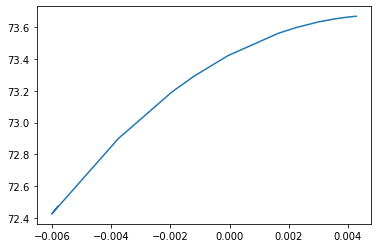

In [ ]:
plt.plot(ytm, pv)

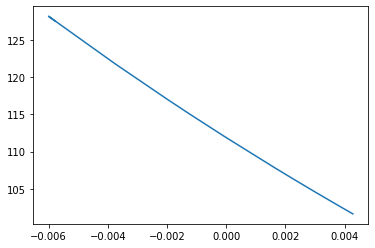

In [ ]:
plt.plot(ytm, pv_trade)